In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import calendar

%matplotlib inline

In [59]:
df = pd.read_csv("/content/processed_data_2.csv")
X = df.drop(columns=['booking status']) #features
y = df['booking status'] #target value

print(np.isnan(y).sum())  # Count the number of NaN values in y
print(y.dtype)

0
int64


split test

In [60]:
# Split data into training (80%) and final test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the splits
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(y_train.dtype)  # Check data type

Training data shape: (28998, 21)
Test data shape: (7250, 21)
int64


create the model

In [61]:
# Define the model
log_reg = LogisticRegression(max_iter=1000, random_state=41)

# Define the hyperparameters grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}  # Trying different values of C

# Set up GridSearchCV
# cv is predefined = 5
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the search on training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameter value
print("Best C value:", grid_search.best_params_['C'])
print("Best cross-validation accuracy:", grid_search.best_score_)


Best C value: 10
Best cross-validation accuracy: 0.7898819356488337


Final Test Accuracy: 0.7876
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.58      0.64      2377
           1       0.81      0.89      0.85      4873

    accuracy                           0.79      7250
   macro avg       0.77      0.73      0.75      7250
weighted avg       0.78      0.79      0.78      7250

Confusion Matrix:
 [[1383  994]
 [ 546 4327]]


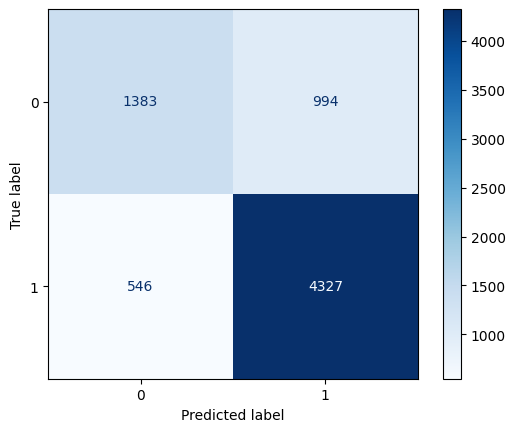

In [62]:
#testing model with test data
log_reg = LogisticRegression(max_iter=1000, C=10, random_state=41)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)  # Predict on test data

accuracy = accuracy_score(y_test, y_pred)
print(f"Final Test Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

#confusion matrix

cm = confusion_matrix(y_test, y_pred)

# Print Confusion Matrix as Numbers
print("Confusion Matrix:\n", cm)

# Plot the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()